In [3]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom, beta
import preliz as pz
from cycler import cycler

from fig.kde import default_cycler

In [2]:
def P(S, A):
    if set(A).issubset(set(S)):
        return len(A)/len(S)
    else:
        return 0

In [4]:
az.style.use('arviz-grayscale')
np.random.seed(314)
default_cycler = cycler(color=["#000000", "#6a6a6a", "#bebebe", "#2a2eec"])
plt.rc('axes', prop_cycle=default_cycler)
plt.rc('figure', dpi=300)

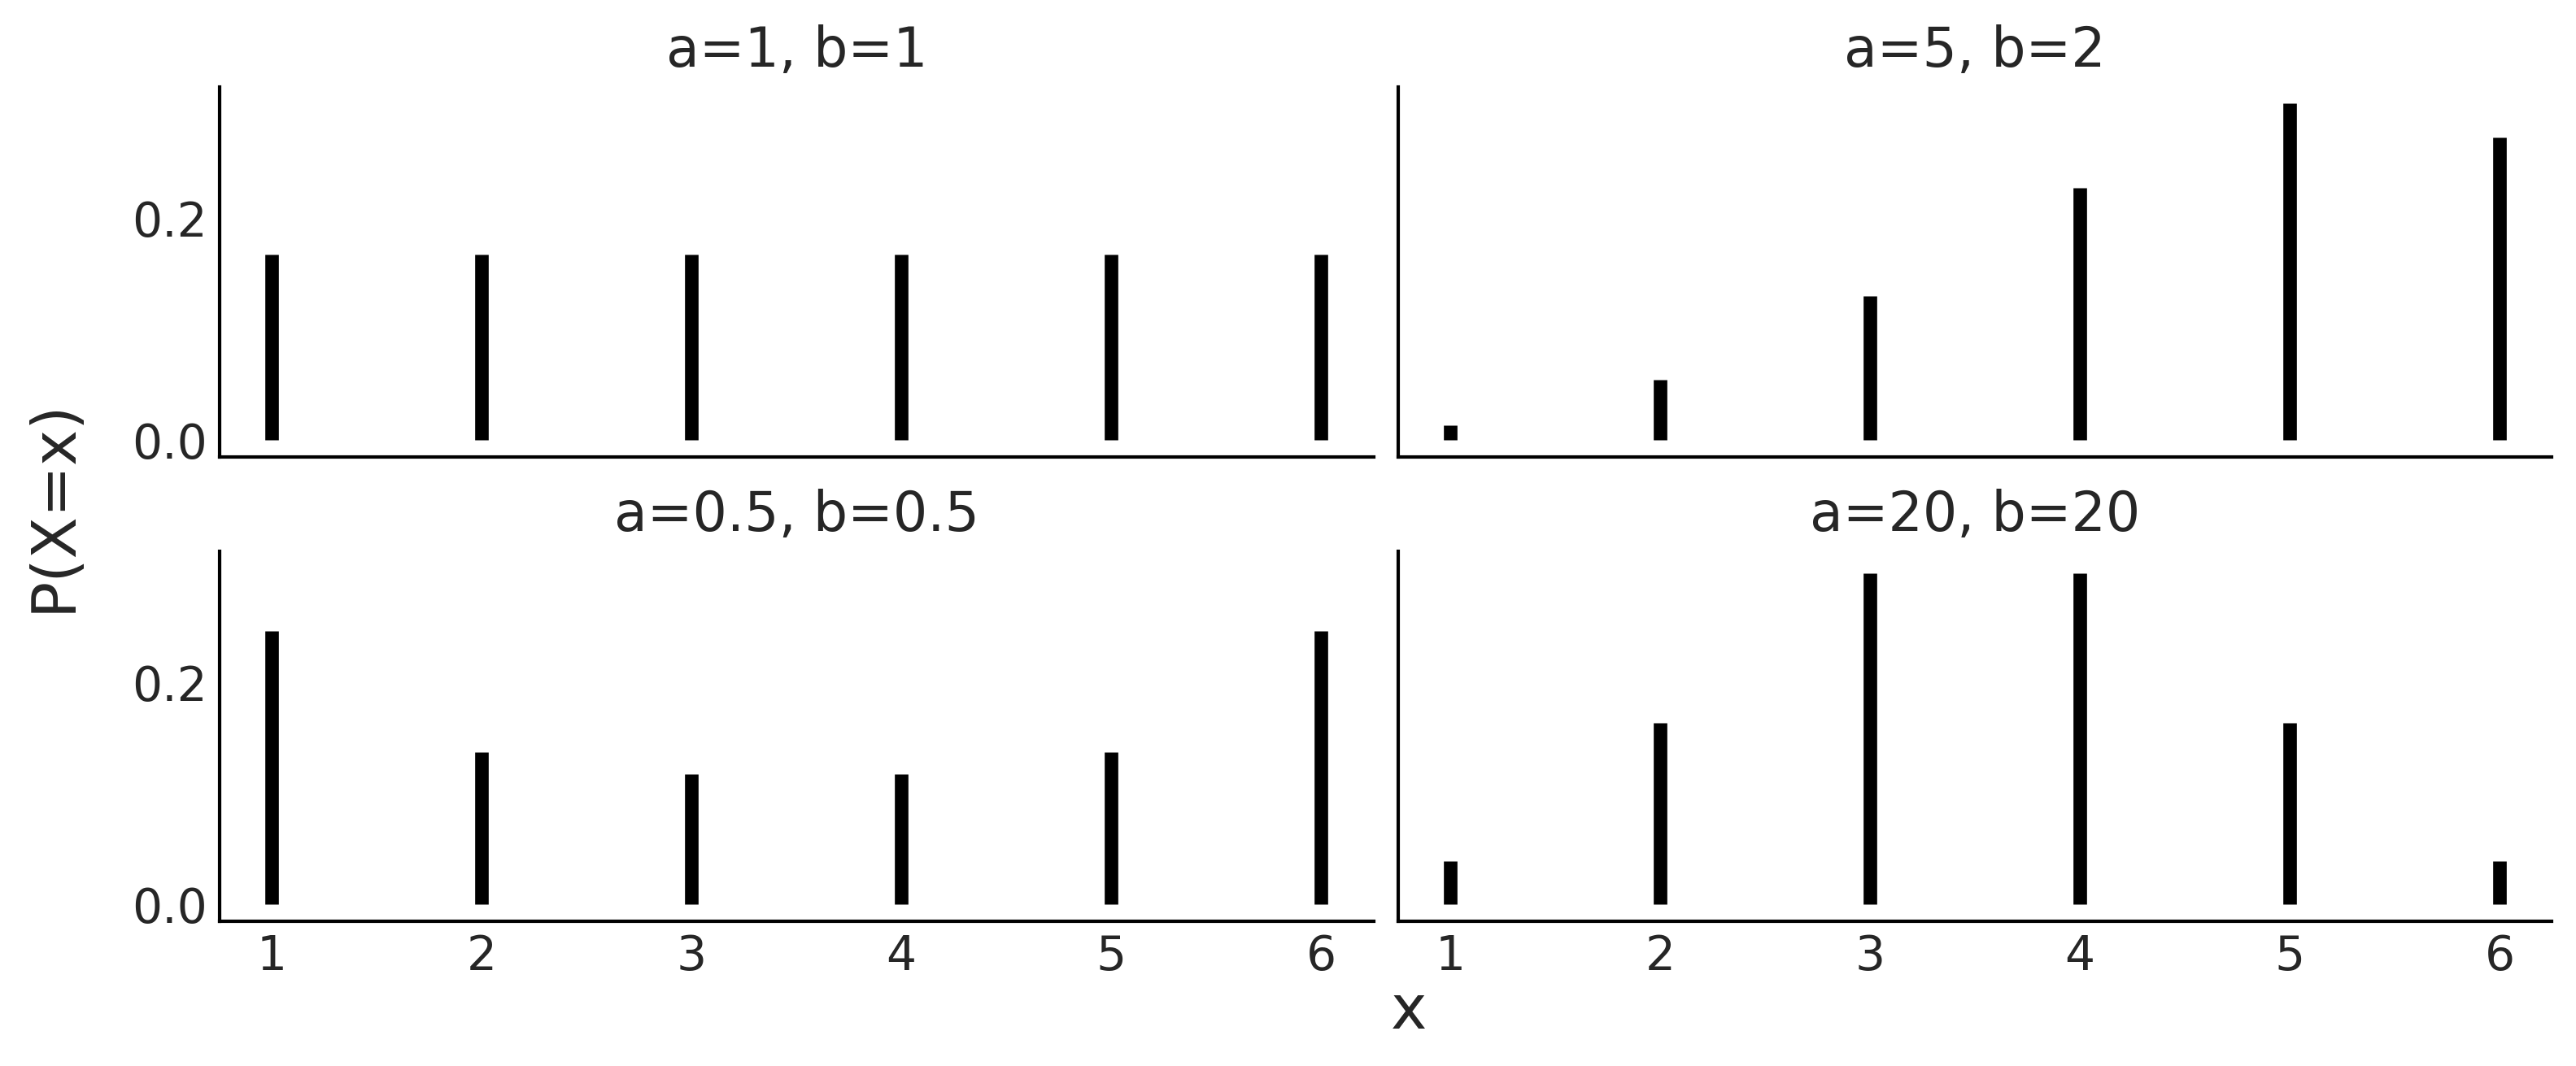

In [8]:
n = 5
x = np.arange(0, 6)

fig, axes = plt.subplots(2, 2, figsize=(10, 4), sharey=True, sharex=True)
axes = np.ravel(axes)

for ax, (a, b) in zip(axes, ((1, 1), (5, 2), (0.5, 0.5), (20, 20))):
    dist_pmf = binom(n, x) * (beta(x+a, n-x+b) / beta(a, b))
    ax.vlines(x, 0, dist_pmf, colors='C0', lw=4)
    ax.set_title(f'a={a}, b={b}')
    ax.set_xticks(x)
    ax.set_xticklabels(x+1)
fig.text(0.52, -0.04, 'x', fontsize=18)
fig.text(-0.04, 0.4, 'P(X=x)', fontsize=18, rotation='vertical')
plt.savefig('fig/dice_distribution.png', bbox_inches='tight')

In [9]:
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_interactive(pointinterval=False)

interactive(children=(FloatSlider(value=10.0, description='alpha (0, inf)', max=110.0, min=2.220446049250313e-…